# Dataset

In [ ]:
import pandas as pd

train_dataset = pd.read_csv('dataset1/train.csv', encoding='utf-8')
val_dataset = pd.read_csv('dataset1/validation.csv', encoding='utf-8')
test_dataset = pd.read_csv('dataset1/test-500.csv', encoding='utf-8')

original_train = train_dataset['label'].apply(lambda x: x == 0).sum()
comp_gen_train = train_dataset['label'].apply(lambda x: x == 1).sum()

original_val = val_dataset['label'].apply(lambda x: x == 0).sum()
comp_gen_val = val_dataset['label'].apply(lambda x: x == 1).sum()

original_test = test_dataset['label'].apply(lambda x: x == 0).sum()
comp_gen_test = test_dataset['label'].apply(lambda x: x == 1).sum()

print(f'Original reviews Train: {original_train}')
print(f'Computer Generated reviews Train: {comp_gen_train}')

print(f'Original reviews Val: {original_val}')
print(f'Computer Generated reviews Val: {comp_gen_val}')

print(f'Original reviews Test: {original_test}')
print(f'Computer Generated reviews Test: {comp_gen_test}')


Original reviews Train: 15716
Computer Generated reviews Train: 15829
Original reviews Val: 4000
Computer Generated reviews Val: 3887
Original reviews Test: 248
Computer Generated reviews Test: 252


In [ ]:
import pandas as pd

train_dataset = pd.read_csv('dataset1/train.csv', encoding='utf-8')
val_dataset = pd.read_csv('dataset1/validation.csv', encoding='utf-8')
test_dataset = pd.read_csv('dataset1/test-500.csv', encoding='utf-8')

# LSTM model

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_dataset['text'].astype(str))  # Ensure 'text' is of string data type

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_dataset['text'].astype(str))
X_val = tokenizer.texts_to_sequences(val_dataset['text'].astype(str))
X_test = tokenizer.texts_to_sequences(test_dataset['text'].astype(str))

# Pad sequences
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Model definition
model10 = Sequential()
model10.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256))
model10.add(LSTM(256, dropout=0.2))
model10.add(Dense(256, activation='relu'))
model10.add(Dropout(0.5))
model10.add(Dense(1, activation='sigmoid'))

# Compile the model
model10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model10.fit(X_train, train_dataset['label'], validation_data=(X_val, val_dataset['label']), epochs=10, batch_size=64)

# Evaluate the model on test data
loss, accuracy = model10.evaluate(X_test, test_dataset['label'])
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Save the trained model
model10.save("models1/lstm_model.h5")
print("Model saved successfully.")


Epoch 1/10
493/493 [==============================] - 110s 222ms/step - loss: 0.2549 - accuracy: 0.8973 - val_loss: 0.1627 - val_accuracy: 0.9376
Epoch 2/10
493/493 [==============================] - 109s 220ms/step - loss: 0.1126 - accuracy: 0.9587 - val_loss: 0.1621 - val_accuracy: 0.9408
Epoch 3/10
493/493 [==============================] - 106s 215ms/step - loss: 0.0721 - accuracy: 0.9745 - val_loss: 0.1569 - val_accuracy: 0.9462
Epoch 4/10
493/493 [==============================] - 102s 207ms/step - loss: 0.0454 - accuracy: 0.9841 - val_loss: 0.2096 - val_accuracy: 0.9365
Epoch 5/10
493/493 [==============================] - 104s 211ms/step - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.2432 - val_accuracy: 0.9348
Epoch 6/10
493/493 [==============================] - 105s 214ms/step - loss: 0.0197 - accuracy: 0.9937 - val_loss: 0.2638 - val_accuracy: 0.9437
Epoch 7/10
493/493 [==============================] - 105s 213ms/step - loss: 0.0167 - accuracy: 0.9943 - val_loss: 0.3225 -

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test data
y_pred_prob = model10.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(test_dataset['label'], y_pred_binary))
print("\nClassification Report:")
print(classification_report(test_dataset['label'], y_pred_binary))


16/16 [==============================] - 1s 45ms/step
Confusion Matrix:
[[233  15]
 [ 16 236]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       248
           1       0.94      0.94      0.94       252

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



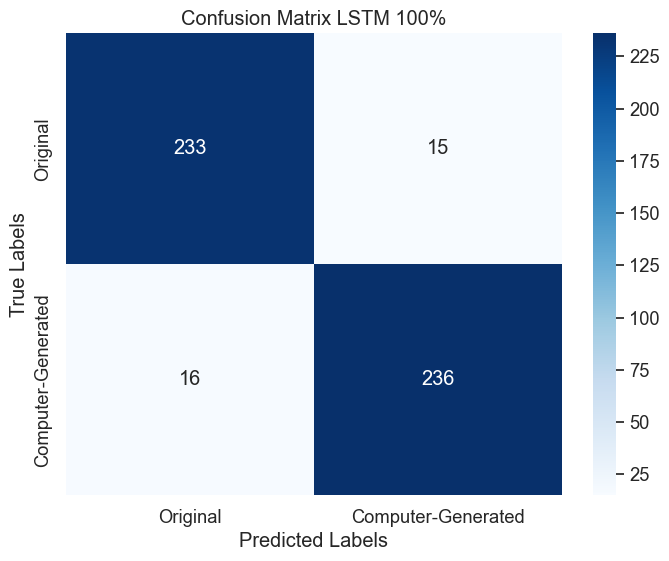

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(test_dataset['label'], y_pred_binary)

# Define class labels
class_names = ['Original' , 'Computer-Generated']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix LSTM 100%')
plt.show()


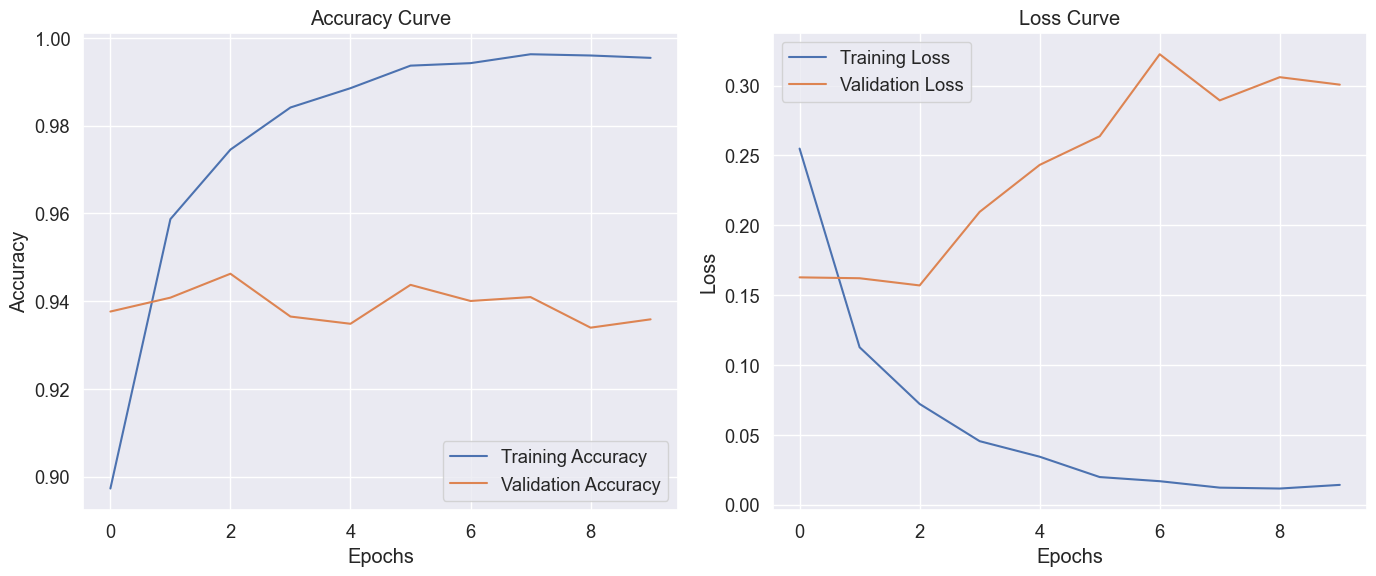

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy curve
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy Curve')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss curve
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# BiLSTM

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional


# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_dataset['text'].astype(str))

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_dataset['text'].astype(str))
X_val = tokenizer.texts_to_sequences(val_dataset['text'].astype(str))
X_test = tokenizer.texts_to_sequences(test_dataset['text'].astype(str))

# Pad sequences
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Model definition
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256))
model.add(Bidirectional(LSTM(256, dropout=0.2)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, train_dataset['label'], validation_data=(X_val, val_dataset['label']), epochs=10, batch_size=64)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, test_dataset['label'])
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Save the trained model
model.save("models1/bilstm_model.h5")
print("Model saved successfully.")


Epoch 1/10
493/493 [==============================] - 134s 270ms/step - loss: 0.2472 - accuracy: 0.8992 - val_loss: 0.1668 - val_accuracy: 0.9318
Epoch 2/10
493/493 [==============================] - 130s 264ms/step - loss: 0.1168 - accuracy: 0.9581 - val_loss: 0.1599 - val_accuracy: 0.9421
Epoch 3/10
493/493 [==============================] - 131s 265ms/step - loss: 0.0714 - accuracy: 0.9749 - val_loss: 0.1607 - val_accuracy: 0.9389
Epoch 4/10
493/493 [==============================] - 131s 265ms/step - loss: 0.0419 - accuracy: 0.9856 - val_loss: 0.1760 - val_accuracy: 0.9388
Epoch 5/10
493/493 [==============================] - 139s 282ms/step - loss: 0.0364 - accuracy: 0.9876 - val_loss: 0.2368 - val_accuracy: 0.9408
Epoch 6/10
493/493 [==============================] - 137s 278ms/step - loss: 0.0300 - accuracy: 0.9899 - val_loss: 0.4065 - val_accuracy: 0.8995
Epoch 7/10
493/493 [==============================] - 133s 271ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.3256 -

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate evaluation metrics
print("\nClassification Report:")
print(classification_report(test_dataset['label'], y_pred_binary))



16/16 [==============================] - 1s 51ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       248
           1       0.91      0.98      0.94       252

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



Confusion Matrix:
[[225  23]
 [  6 246]]


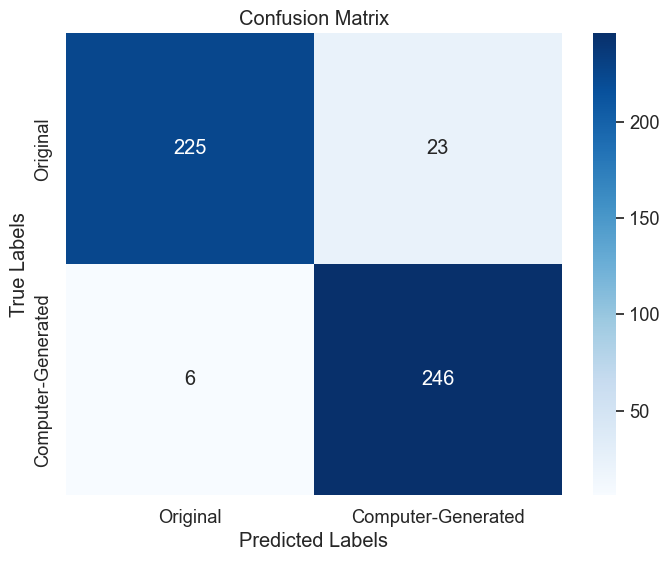

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_dataset['label'], y_pred_binary)

print("Confusion Matrix:")
print(cm)


# Define class labels
class_names = ['Original' , 'Computer-Generated']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


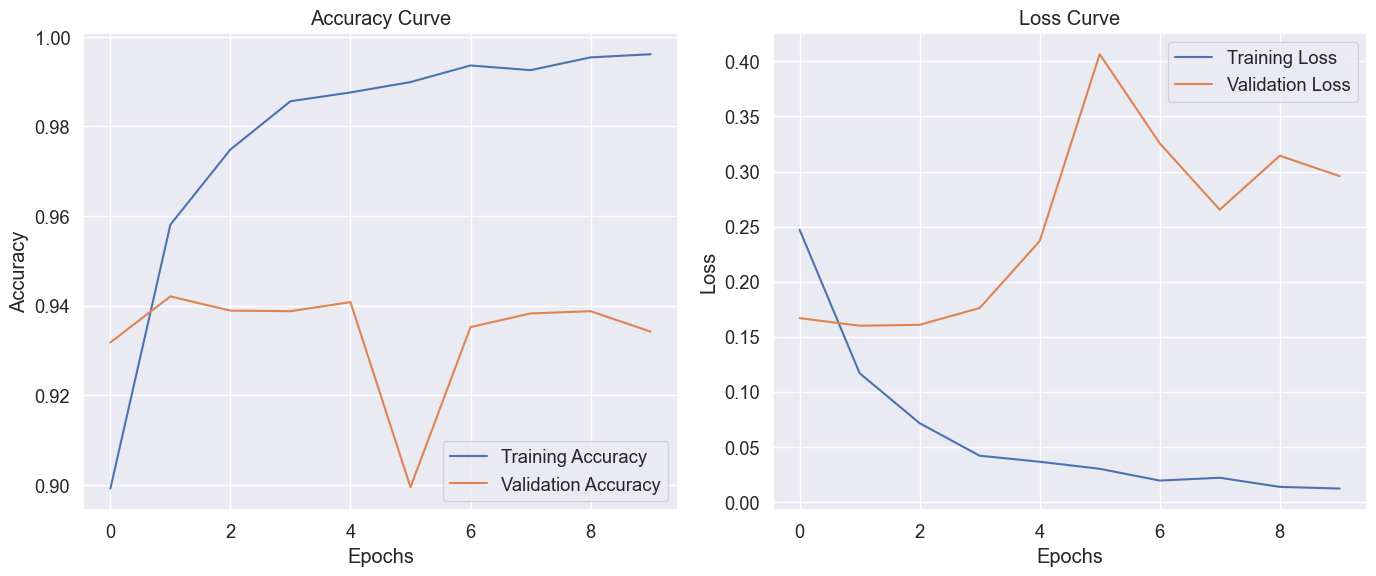

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy curve
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy Curve')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss curve
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# Extracting 50%

In [ ]:
import pandas as pd

# Read the original CSV files
train_dataset = pd.read_csv('dataset1/train.csv', encoding='utf-8')
val_dataset = pd.read_csv('dataset1/validation.csv', encoding='utf-8')

# Randomly sample 50% of the data from each dataset
train_50 = train_dataset.sample(frac=0.5, random_state=1)
val_50 = val_dataset.sample(frac=0.5, random_state=1)

# Shuffle the rows
train_50 = train_50.sample(frac=1, random_state=1)
val_50 = val_50.sample(frac=1, random_state=1)

# Reset the index
train_50.reset_index(drop=True, inplace=True)
val_50.reset_index(drop=True, inplace=True)

# Save the 50% data to new CSV files
train_50.to_csv('dataset1/50/train50.csv', index=False)
val_50.to_csv('dataset1/50/val50.csv', index=False)


In [ ]:
original_train = train_50['label'].apply(lambda x: x == 0).sum()
comp_gen_train = train_50['label'].apply(lambda x: x == 1).sum()

original_val = val_50['label'].apply(lambda x: x == 0).sum()
comp_gen_val = val_50['label'].apply(lambda x: x == 1).sum()


print(f'Original reviews Train: {original_train}')
print(f'Computer Generated reviews Train: {comp_gen_train}')

print(f'Original reviews Val: {original_val}')
print(f'Computer Generated reviews Val: {comp_gen_val}')



Original reviews Train: 7862
Computer Generated reviews Train: 7910
Original reviews Val: 1998
Computer Generated reviews Val: 1946


In [ ]:
# Load the csv files
train_dataset = pd.read_csv("dataset1/50/train50.csv", encoding='utf-8')
val_dataset = pd.read_csv("dataset1/50/val50.csv", encoding='utf-8')
test_dataset = pd.read_csv("dataset1/test-500.csv", encoding='utf-8')


# LSTM-50%

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense


# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_dataset['text'].astype(str))

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_dataset['text'].astype(str))
X_val = tokenizer.texts_to_sequences(val_dataset['text'].astype(str))
X_test = tokenizer.texts_to_sequences(test_dataset['text'].astype(str))

# Pad sequences
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Model definition
model_50 = Sequential()
model_50.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256))
model_50.add(LSTM(256, dropout=0.2))
model_50.add(Dense(256, activation='relu'))
model_50.add(Dropout(0.5))
model_50.add(Dense(1, activation='sigmoid'))

# Compile the model
model_50.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_50.fit(X_train, train_dataset['label'], validation_data=(X_val, val_dataset['label']), epochs=10, batch_size=64)

# Evaluate the model on test data
loss, accuracy = model_50.evaluate(X_test, test_dataset['label'])
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Save the trained model
model_50.save("models1/50lstm_model.h5")
print("Model saved successfully.")


Epoch 1/10
247/247 [==============================] - 48s 190ms/step - loss: 0.3082 - accuracy: 0.8676 - val_loss: 0.1826 - val_accuracy: 0.9300
Epoch 2/10
247/247 [==============================] - 48s 195ms/step - loss: 0.1368 - accuracy: 0.9495 - val_loss: 0.1904 - val_accuracy: 0.9300
Epoch 3/10
247/247 [==============================] - 47s 191ms/step - loss: 0.0783 - accuracy: 0.9725 - val_loss: 0.2264 - val_accuracy: 0.9224
Epoch 4/10
247/247 [==============================] - 51s 206ms/step - loss: 0.0486 - accuracy: 0.9835 - val_loss: 0.2511 - val_accuracy: 0.9244
Epoch 5/10
247/247 [==============================] - 52s 212ms/step - loss: 0.0323 - accuracy: 0.9892 - val_loss: 0.2625 - val_accuracy: 0.9257
Epoch 6/10
247/247 [==============================] - 50s 203ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.3582 - val_accuracy: 0.9201
Epoch 7/10
247/247 [==============================] - 51s 208ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.3979 - val_ac

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test data
y_pred_prob = model_50.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(test_dataset['label'], y_pred_binary))
print("\nClassification Report:")
print(classification_report(test_dataset['label'], y_pred_binary))


16/16 [==============================] - 1s 38ms/step
Confusion Matrix:
[[212  36]
 [ 14 238]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       248
           1       0.87      0.94      0.90       252

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



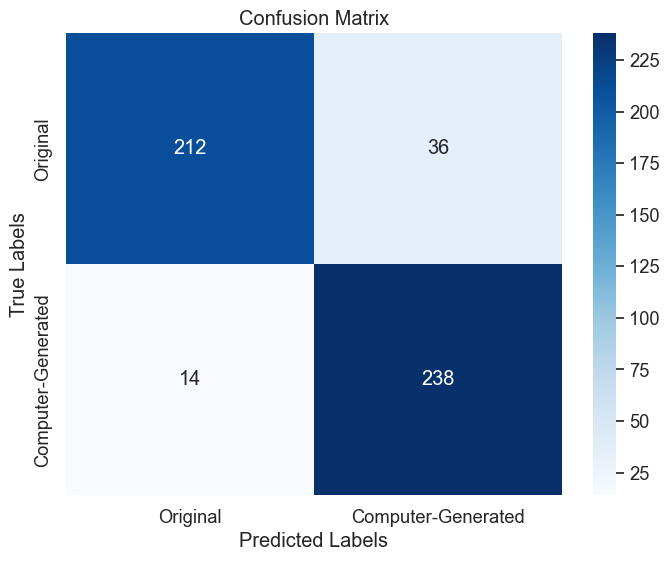

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(test_dataset['label'], y_pred_binary)

# Define class labels
class_names = ['Original' , 'Computer-Generated']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


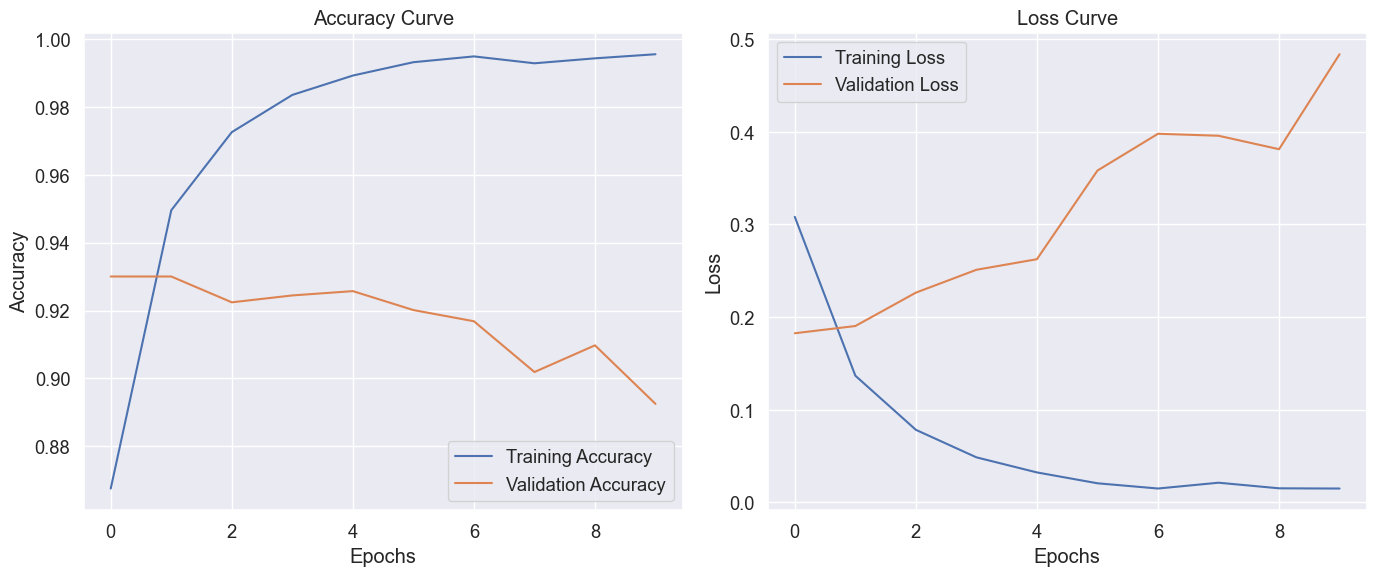

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy curve
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy Curve')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss curve
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# BiLSTM-50%

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_dataset['text'].astype(str))

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_dataset['text'].astype(str))
X_val = tokenizer.texts_to_sequences(val_dataset['text'].astype(str))
X_test = tokenizer.texts_to_sequences(test_dataset['text'].astype(str))

# Pad sequences
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Model definition
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256))
model.add(Bidirectional(LSTM(256, dropout=0.2)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, train_dataset['label'], validation_data=(X_val, val_dataset['label']), epochs=10, batch_size=64)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, test_dataset['label'])
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Save the trained model
model.save("models1/50bilstm_model.h5")
print("Model saved successfully.")


Epoch 1/10
247/247 [==============================] - 67s 264ms/step - loss: 0.3424 - accuracy: 0.8445 - val_loss: 0.1911 - val_accuracy: 0.9242
Epoch 2/10
247/247 [==============================] - 67s 272ms/step - loss: 0.1457 - accuracy: 0.9449 - val_loss: 0.2510 - val_accuracy: 0.9120
Epoch 3/10
247/247 [==============================] - 67s 273ms/step - loss: 0.0683 - accuracy: 0.9774 - val_loss: 0.2526 - val_accuracy: 0.9252
Epoch 4/10
247/247 [==============================] - 66s 267ms/step - loss: 0.0525 - accuracy: 0.9823 - val_loss: 0.2501 - val_accuracy: 0.9275
Epoch 5/10
247/247 [==============================] - 66s 267ms/step - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.3134 - val_accuracy: 0.9201
Epoch 6/10
247/247 [==============================] - 66s 268ms/step - loss: 0.0278 - accuracy: 0.9905 - val_loss: 0.4218 - val_accuracy: 0.9194
Epoch 7/10
247/247 [==============================] - 64s 260ms/step - loss: 0.0228 - accuracy: 0.9918 - val_loss: 0.3954 - val_ac

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate evaluation metrics
print("\nClassification Report:")
print(classification_report(test_dataset['label'], y_pred_binary))



16/16 [==============================] - 1s 47ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       248
           1       0.90      0.94      0.92       252

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



Confusion Matrix:
[[223  25]
 [ 14 238]]


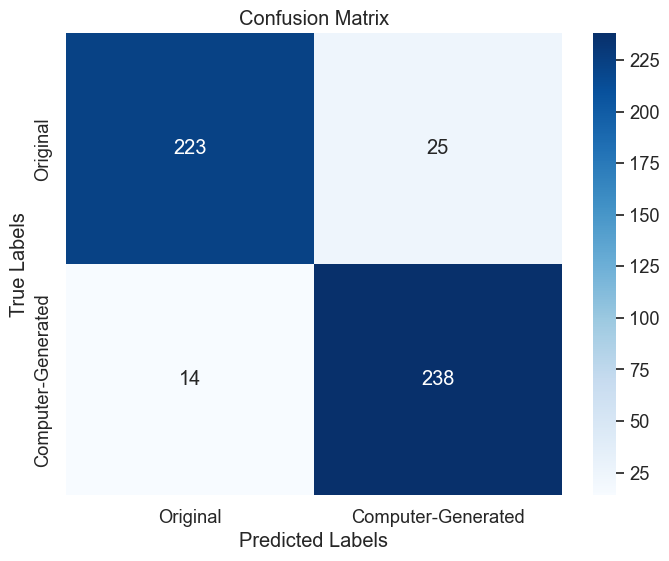

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(test_dataset['label'], y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Define class labels
class_names = ['Original' , 'Computer-Generated']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


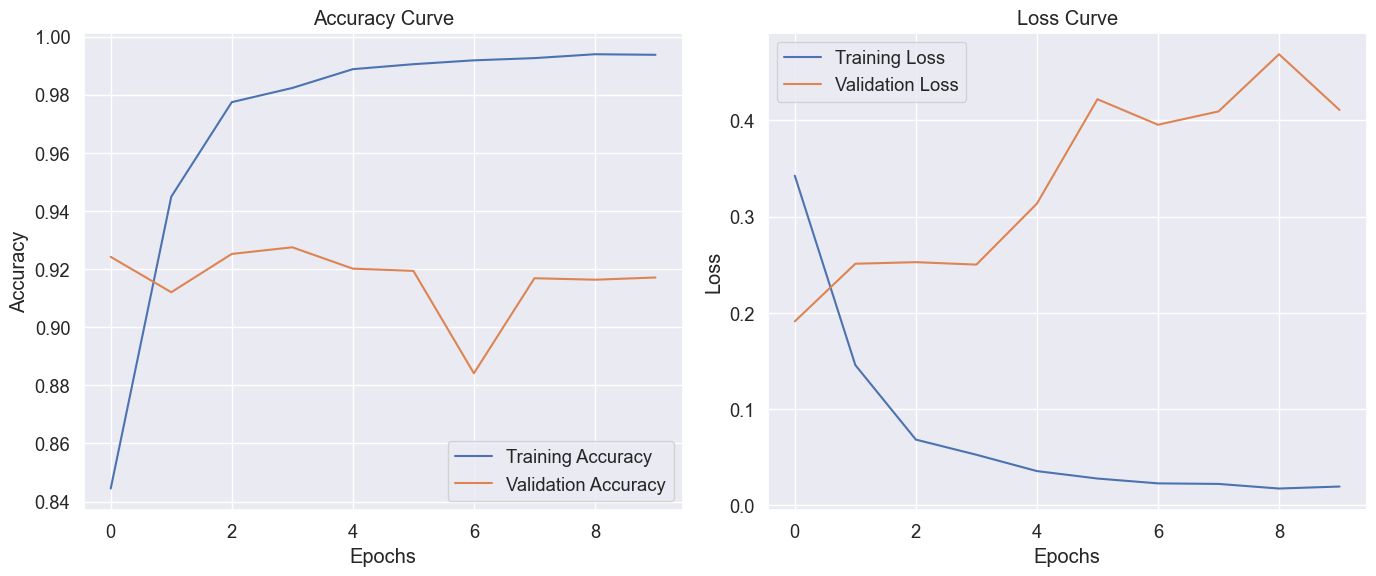

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy curve
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy Curve')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss curve
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# Extracting 10%

In [ ]:
import pandas as pd

# Read the original CSV files
train_dataset = pd.read_csv('dataset1/train.csv')
val_dataset = pd.read_csv('dataset1/validation.csv')

# Randomly sample 10% of the data from each dataset
train_10 = train_dataset.sample(frac=0.1, random_state=1)
val_10 = val_dataset.sample(frac=0.1, random_state=1)

# Shuffle the rows
train_10 = train_10.sample(frac=1, random_state=1)
val_10 = val_10.sample(frac=1, random_state=1)

# Reset the index
train_10.reset_index(drop=True, inplace=True)
val_10.reset_index(drop=True, inplace=True)

# Save the 10% data to new CSV files
train_10.to_csv('dataset1/10/train10.csv', index=False)
val_10.to_csv('dataset1/10/val10.csv', index=False)


In [ ]:
original_train = train_10['label'].apply(lambda x: x == 0).sum()
comp_gen_train = train_10['label'].apply(lambda x: x == 1).sum()

original_val = val_10['label'].apply(lambda x: x == 0).sum()
comp_gen_val = val_10['label'].apply(lambda x: x == 1).sum()


print(f'Original reviews Train: {original_train}')
print(f'Computer Generated reviews Train: {comp_gen_train}')

print(f'Original reviews Val: {original_val}')
print(f'Computer Generated reviews Val: {comp_gen_val}')

Original reviews Train: 1586
Computer Generated reviews Train: 1568
Original reviews Val: 388
Computer Generated reviews Val: 401


In [ ]:
# Load the csv files
train_dataset = pd.read_csv("dataset1/10/train10.csv", encoding='utf-8')
val_dataset = pd.read_csv("dataset1/10/val10.csv", encoding='utf-8')
test_dataset = pd.read_csv("dataset1/test-500.csv", encoding='utf-8')

# LSTM - 10%

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense


# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_dataset['text'].astype(str))  # Ensure 'text' is of string data type

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_dataset['text'].astype(str))
X_val = tokenizer.texts_to_sequences(val_dataset['text'].astype(str))
X_test = tokenizer.texts_to_sequences(test_dataset['text'].astype(str))

# Pad sequences
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Model definition
model_10 = Sequential()
model_10.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256))
model_10.add(LSTM(256, dropout=0.2))
model_10.add(Dense(256, activation='relu'))
model_10.add(Dropout(0.5))
model_10.add(Dense(1, activation='sigmoid'))

# Compile the model
model_10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_10.fit(X_train, train_dataset['label'], validation_data=(X_val, val_dataset['label']), epochs=10, batch_size=64)

# Evaluate the model on test data
loss, accuracy = model_10.evaluate(X_test, test_dataset['label'])
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Save the trained model
model_10.save("models1/10lstm_model.h5")
print("Model saved successfully.")


Epoch 1/10
50/50 [==============================] - 10s 187ms/step - loss: 0.5438 - accuracy: 0.7264 - val_loss: 0.3298 - val_accuracy: 0.8428
Epoch 2/10
50/50 [==============================] - 10s 196ms/step - loss: 0.2350 - accuracy: 0.9144 - val_loss: 0.2661 - val_accuracy: 0.8859
Epoch 3/10
50/50 [==============================] - 10s 193ms/step - loss: 0.0967 - accuracy: 0.9645 - val_loss: 0.5455 - val_accuracy: 0.8403
Epoch 4/10
50/50 [==============================] - 10s 193ms/step - loss: 0.0810 - accuracy: 0.9740 - val_loss: 0.4685 - val_accuracy: 0.8669
Epoch 5/10
50/50 [==============================] - 9s 187ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.4799 - val_accuracy: 0.8606
Epoch 6/10
50/50 [==============================] - 10s 196ms/step - loss: 0.0382 - accuracy: 0.9873 - val_loss: 0.3964 - val_accuracy: 0.8783
Epoch 7/10
50/50 [==============================] - 10s 190ms/step - loss: 0.0319 - accuracy: 0.9905 - val_loss: 0.4981 - val_accuracy: 0.8657


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 1s 32ms/step
Confusion Matrix:
[[205  43]
 [ 17 235]]


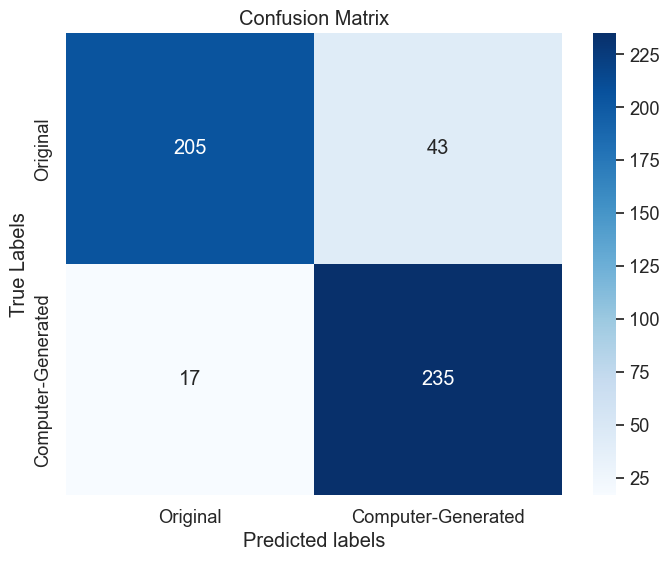


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       248
           1       0.85      0.93      0.89       252

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Predict on test data
y_pred_prob = model_10.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(test_dataset['label'], y_pred_binary)
print(cm)


# Define class labels
class_names = ['Original' , 'Computer-Generated']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Classification Report
print("\nClassification Report:")
print(classification_report(test_dataset['label'], y_pred_binary))


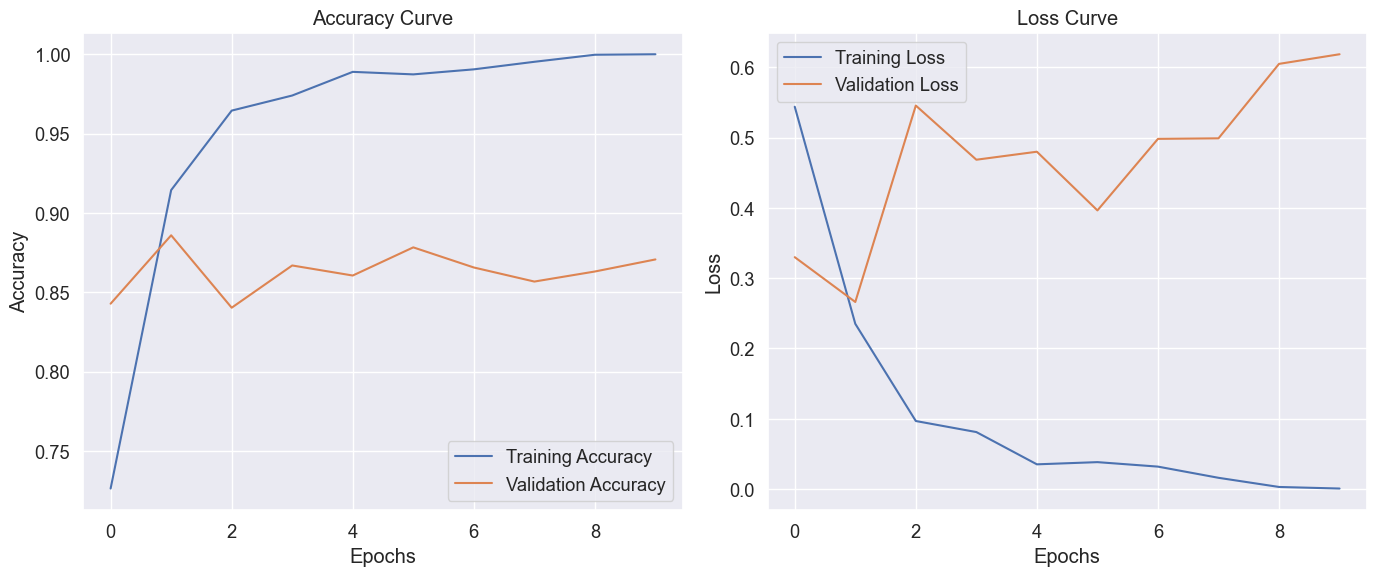

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy curve
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy Curve')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss curve
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# BiLSTM-10%

In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_dataset['text'].astype(str))  # Ensure 'text' is of string data type

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_dataset['text'].astype(str))
X_val = tokenizer.texts_to_sequences(val_dataset['text'].astype(str))
X_test = tokenizer.texts_to_sequences(test_dataset['text'].astype(str))

# Pad sequences
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Model definition
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256))
model.add(Bidirectional(LSTM(256, dropout=0.2)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, train_dataset['label'], validation_data=(X_val, val_dataset['label']), epochs=10, batch_size=64)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, test_dataset['label'])
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Save the trained model
model.save("models1/10bilstm_model.h5")
print("Model saved successfully.")


Epoch 1/10
50/50 [==============================] - 14s 242ms/step - loss: 0.6193 - accuracy: 0.6877 - val_loss: 0.3483 - val_accuracy: 0.8530
Epoch 2/10
50/50 [==============================] - 12s 243ms/step - loss: 0.2302 - accuracy: 0.9106 - val_loss: 0.2998 - val_accuracy: 0.8733
Epoch 3/10
50/50 [==============================] - 12s 245ms/step - loss: 0.1216 - accuracy: 0.9588 - val_loss: 0.3348 - val_accuracy: 0.8619
Epoch 4/10
50/50 [==============================] - 12s 249ms/step - loss: 0.0726 - accuracy: 0.9788 - val_loss: 0.3945 - val_accuracy: 0.8771
Epoch 5/10
50/50 [==============================] - 12s 240ms/step - loss: 0.0253 - accuracy: 0.9911 - val_loss: 0.4487 - val_accuracy: 0.8771
Epoch 6/10
50/50 [==============================] - 12s 238ms/step - loss: 0.0103 - accuracy: 0.9978 - val_loss: 0.6702 - val_accuracy: 0.8492
Epoch 7/10
50/50 [==============================] - 12s 239ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.5691 - val_accuracy: 0.8251

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 1s 53ms/step
Confusion Matrix:
[[219  29]
 [ 37 215]]


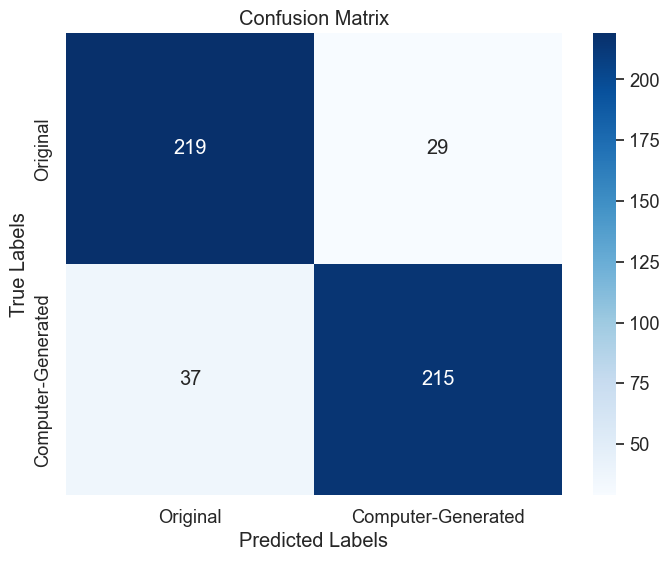


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       248
           1       0.88      0.85      0.87       252

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(test_dataset['label'], y_pred_binary)
print(cm)


# Define class labels
class_names = ['Original' , 'Computer-Generated']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(test_dataset['label'], y_pred_binary))



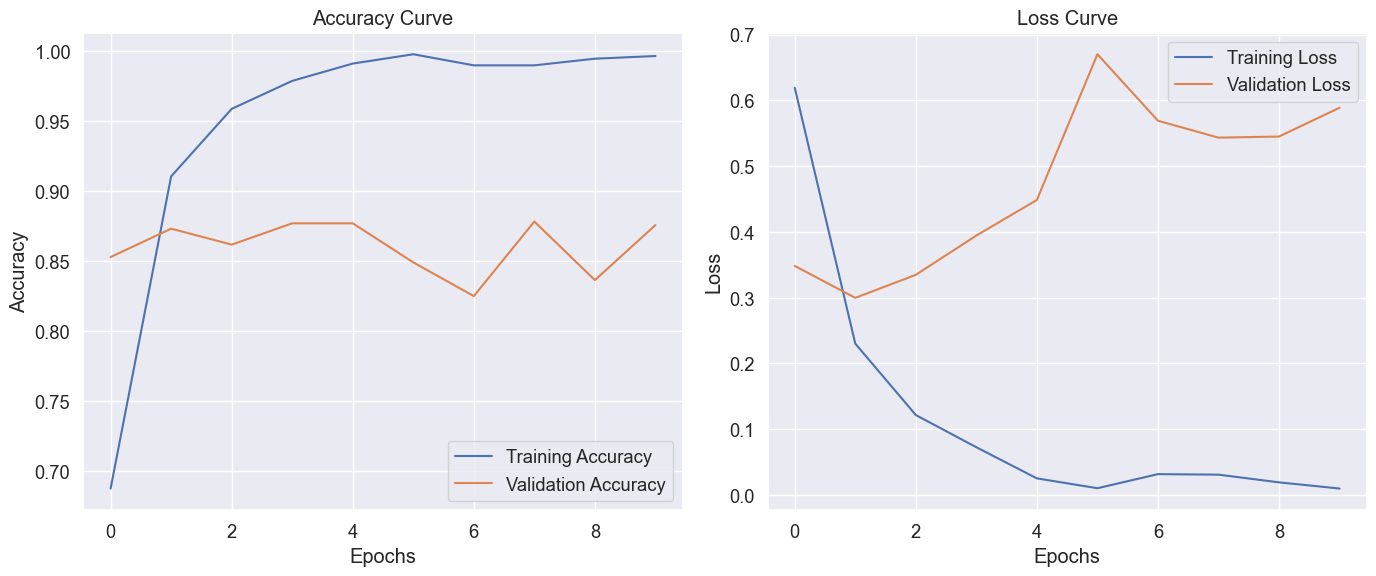

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy curve
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy Curve')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss curve
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# Extracting 5%

In [ ]:
import pandas as pd

# Read the original CSV files
train_dataset = pd.read_csv('dataset1/train.csv')
val_dataset = pd.read_csv('dataset1/validation.csv')

# Randomly sample 10% of the data from each dataset
train_05 = train_dataset.sample(frac=0.05, random_state=1)
val_05 = val_dataset.sample(frac=0.05, random_state=1)

# Shuffle the rows
train_05 = train_05.sample(frac=1, random_state=1)
val_05 = val_05.sample(frac=1, random_state=1)

# Reset the index
train_05.reset_index(drop=True, inplace=True)
val_05.reset_index(drop=True, inplace=True)

# Save the 10% data to new CSV files
train_05.to_csv('dataset1/5/train05.csv', index=False)
val_05.to_csv('dataset1/5/val05.csv', index=False)



In [ ]:
original_train = train_05['label'].apply(lambda x: x == 0).sum()
comp_gen_train = train_05['label'].apply(lambda x: x == 1).sum()

original_val = val_05['label'].apply(lambda x: x == 0).sum()
comp_gen_val = val_05['label'].apply(lambda x: x == 1).sum()


print(f'Original reviews Train: {original_train}')
print(f'Computer Generated reviews Train: {comp_gen_train}')

print(f'Original reviews Val: {original_val}')
print(f'Computer Generated reviews Val: {comp_gen_val}')


Original reviews Train: 790
Computer Generated reviews Train: 787
Original reviews Val: 193
Computer Generated reviews Val: 201


In [ ]:
# Load the csv files
train_dataset = pd.read_csv("dataset1/5/train05.csv", encoding='utf-8')
val_dataset = pd.read_csv("dataset1/5/val05.csv", encoding='utf-8')
test_dataset = pd.read_csv("dataset1/test-500.csv", encoding='utf-8')

# LSTM-5%

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout


# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_dataset['text'].astype(str))  # Ensure 'text' is of string data type

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_dataset['text'].astype(str))
X_val = tokenizer.texts_to_sequences(val_dataset['text'].astype(str))
X_test = tokenizer.texts_to_sequences(test_dataset['text'].astype(str))

# Pad sequences
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Model definition
model_10 = Sequential()
model_10.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256))
model_10.add(LSTM(256, dropout=0.2))
model_10.add(Dense(256, activation='relu'))
model_10.add(Dropout(0.5))
model_10.add(Dense(1, activation='sigmoid'))

# Compile the model
model_10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_10.fit(X_train, train_dataset['label'], validation_data=(X_val, val_dataset['label']), epochs=10, batch_size=64)

# Evaluate the model on test data
loss, accuracy = model_10.evaluate(X_test, test_dataset['label'])
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Save the trained model
model_10.save("models1/05lstm_model.h5")
print("Model saved successfully.")


Epoch 1/10
25/25 [==============================] - 6s 205ms/step - loss: 0.6280 - accuracy: 0.6899 - val_loss: 0.3962 - val_accuracy: 0.8198
Epoch 2/10
25/25 [==============================] - 6s 242ms/step - loss: 0.3532 - accuracy: 0.8649 - val_loss: 0.3334 - val_accuracy: 0.8553
Epoch 3/10
25/25 [==============================] - 6s 232ms/step - loss: 0.1758 - accuracy: 0.9410 - val_loss: 0.4704 - val_accuracy: 0.8350
Epoch 4/10
25/25 [==============================] - 5s 220ms/step - loss: 0.1196 - accuracy: 0.9740 - val_loss: 0.4210 - val_accuracy: 0.8249
Epoch 5/10
25/25 [==============================] - 6s 228ms/step - loss: 0.0353 - accuracy: 0.9911 - val_loss: 0.4982 - val_accuracy: 0.8198
Epoch 6/10
25/25 [==============================] - 6s 253ms/step - loss: 0.0139 - accuracy: 0.9968 - val_loss: 0.5705 - val_accuracy: 0.8223
Epoch 7/10
25/25 [==============================] - 6s 235ms/step - loss: 0.0061 - accuracy: 0.9994 - val_loss: 0.6197 - val_accuracy: 0.8350
Epoch 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 1s 51ms/step
Confusion Matrix:
[[210  38]
 [ 29 223]]


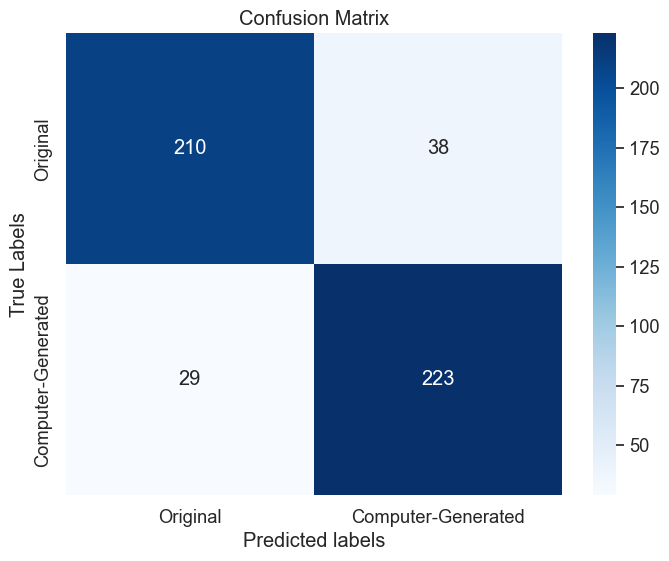


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       248
           1       0.85      0.88      0.87       252

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Predict on test data
y_pred_prob = model_10.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(test_dataset['label'], y_pred_binary)
print(cm)


# Define class labels
class_names = ['Original' , 'Computer-Generated']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Classification Report
print("\nClassification Report:")
print(classification_report(test_dataset['label'], y_pred_binary))


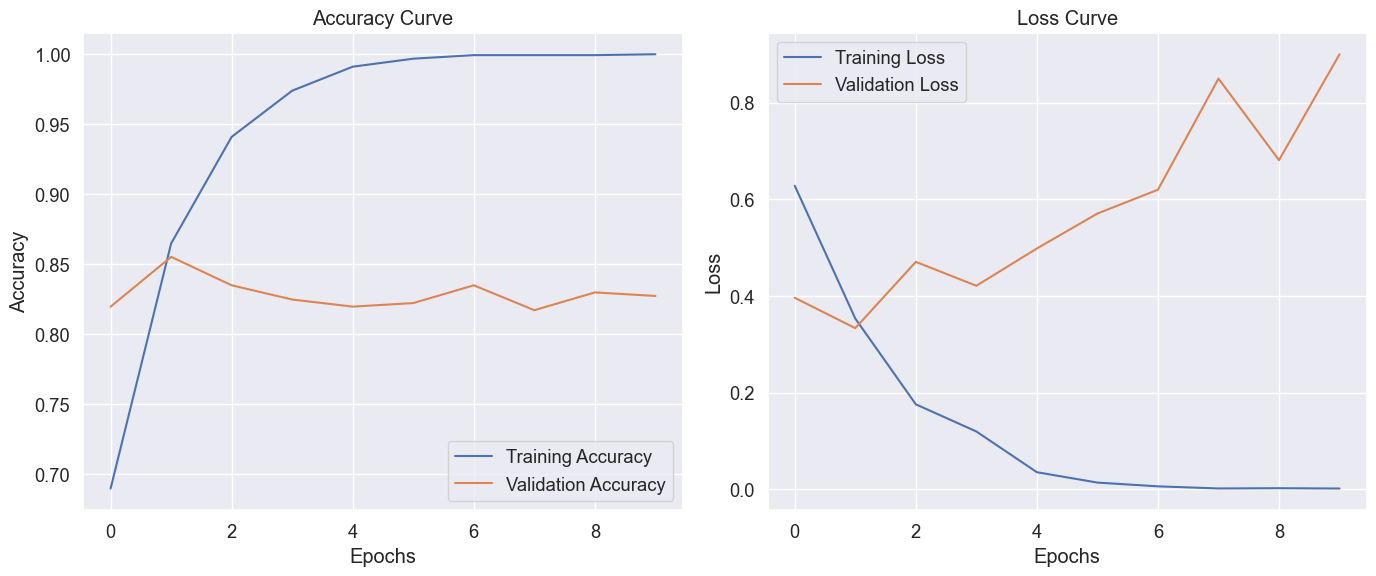

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy curve
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy Curve')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss curve
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# BiLSTM-5%

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_dataset['text'].astype(str))  # Ensure 'text' is of string data type

# Convert text to sequences
X_train = tokenizer.texts_to_sequences(train_dataset['text'].astype(str))
X_val = tokenizer.texts_to_sequences(val_dataset['text'].astype(str))
X_test = tokenizer.texts_to_sequences(test_dataset['text'].astype(str))

# Pad sequences
maxlen = 100
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Model definition
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=256))
model.add(Bidirectional(LSTM(256, dropout=0.2)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, train_dataset['label'], validation_data=(X_val, val_dataset['label']), epochs=10, batch_size=64)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, test_dataset['label'])
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Save the trained model
model.save("models1/05bilstm_model.h5")
print("Model saved successfully.")


Epoch 1/10
25/25 [==============================] - 9s 312ms/step - loss: 0.6553 - accuracy: 0.6157 - val_loss: 0.5669 - val_accuracy: 0.7690
Epoch 2/10
25/25 [==============================] - 7s 288ms/step - loss: 0.3658 - accuracy: 0.8408 - val_loss: 0.3826 - val_accuracy: 0.8629
Epoch 3/10
25/25 [==============================] - 7s 297ms/step - loss: 0.1415 - accuracy: 0.9569 - val_loss: 0.3440 - val_accuracy: 0.8629
Epoch 4/10
25/25 [==============================] - 7s 299ms/step - loss: 0.0783 - accuracy: 0.9753 - val_loss: 0.4973 - val_accuracy: 0.8426
Epoch 5/10
25/25 [==============================] - 8s 305ms/step - loss: 0.0470 - accuracy: 0.9867 - val_loss: 0.5219 - val_accuracy: 0.8274
Epoch 6/10
25/25 [==============================] - 7s 300ms/step - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.5204 - val_accuracy: 0.8426
Epoch 7/10
25/25 [==============================] - 7s 287ms/step - loss: 0.0129 - accuracy: 0.9975 - val_loss: 0.6673 - val_accuracy: 0.8401
Epoch 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 1s 65ms/step
Confusion Matrix:
[[186  62]
 [ 36 216]]


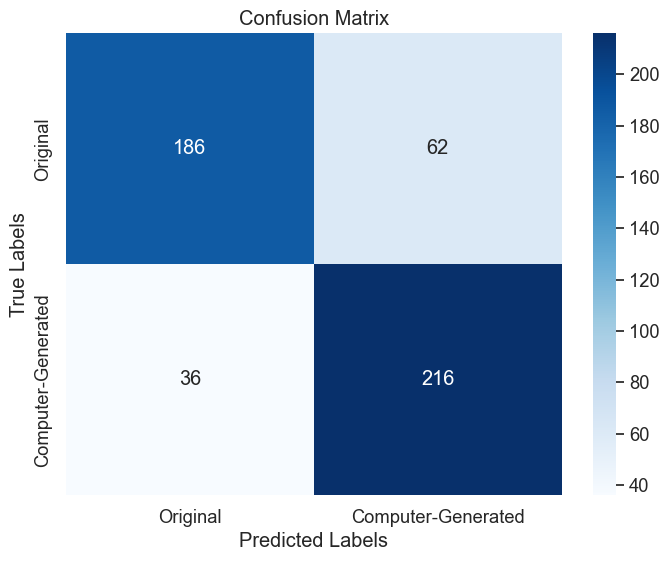


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       248
           1       0.78      0.86      0.82       252

    accuracy                           0.80       500
   macro avg       0.81      0.80      0.80       500
weighted avg       0.81      0.80      0.80       500



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(test_dataset['label'], y_pred_binary)
print(cm)


# Define class labels
class_names = ['Original' , 'Computer-Generated']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(test_dataset['label'], y_pred_binary))



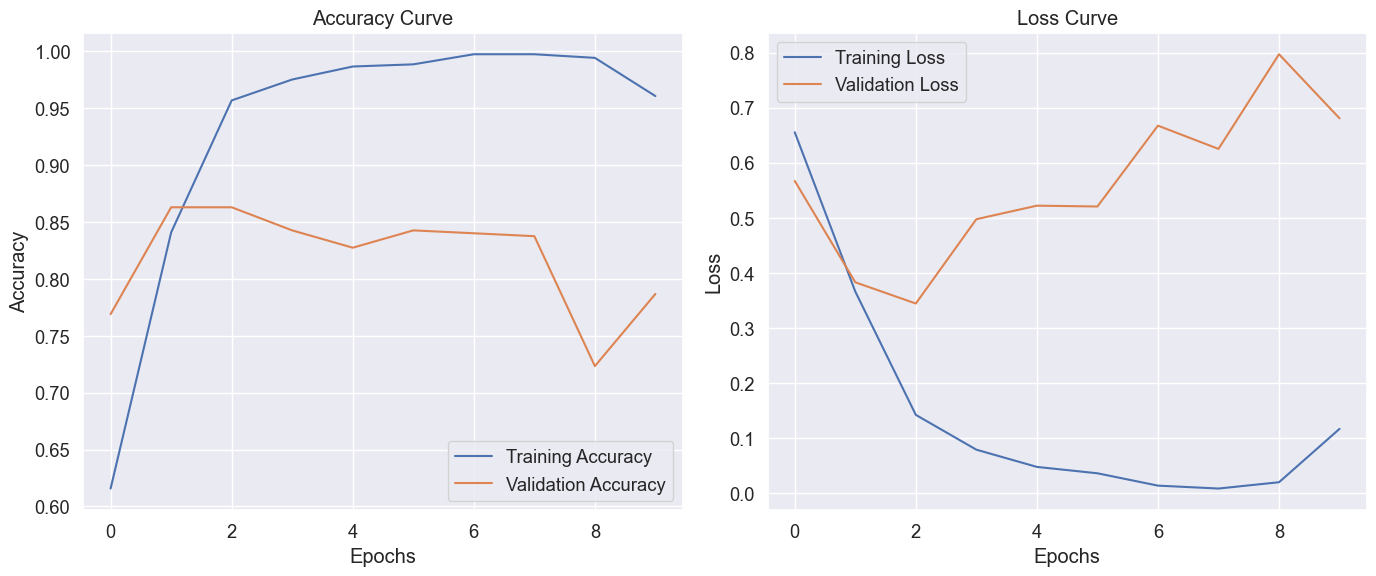

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy curve
axs[0].plot(history.history['accuracy'], label='Training Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy Curve')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss curve
axs[1].plot(history.history['loss'], label='Training Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()